In [28]:
import pickle
import os

## filename handle

file_name = "example/sample_file.pdf"
file_name_seperated = os.path.splitext(os.path.basename(file_name))[0]
### result table summary cache handle
context_result_file_path = f"pkl/{file_name_seperated}_context.pkl"
langchain_result_file_path = f"pkl/{file_name_seperated}_langchain_summary_results.pkl"
dspy_result_file_path = f"pkl/{file_name_seperated}_dspy_summary_results.pkl"

In [29]:
# Summarize한 context 가져오기
with open(context_result_file_path, 'rb') as f:
    full_context = pickle.load(f)

# Langchain 결과 불러오기
with open(langchain_result_file_path, 'rb') as f:
    langchain_results = pickle.load(f)

# DSPy 결과 불러오기
with open(dspy_result_file_path, 'rb') as f:
    dspy_results = pickle.load(f)


print("Full context related:", full_context)
print("Langchain Results:", langchain_results)
print("DSPy Results:", dspy_results)

Full context related: ['\nElement Composition % Carbon Silicon Manganese Phosphorus Sulfur Chromium Copper Oxygen Nickel Molybdenum Chromium & Nickel Vanadium DI (Ideal Diameter) 1.4 - 1.80 (Calculated) ASTM A 255 0.42 - 0.48 0.15 - 0.35 0.60 - 0.90 0.030 Max 0.035 Max 0.10 - 0.20 0.30 Max less than 20PPM 0.20 Max 0.04 Max Not to exceed 0.35% 0.100 Max\n', '\nTable 2 Type A B C D Thin 3 2 ½ 2 1 ½ Heavy 2 2 1 1\n', '\nTable 3 Length of Macro-Streak flaw (mm) Number of Macro-Streak flaw (per 100cm sq) Over 0.5 to 1.0 incl. 6.0 Max Over 1.0 to 2.0 incl. 1.5 Max Over 2.0 to 4.0 incl. 1.0 Max\n', '\nHeat Treatment Tempering (Forced Cooling) Hardening (Water Quench) Yield Strength Kg/mm² Tensile Strength Kg/mm² Physical Properties Elongation % Reduction of Area % Charpy Impact Test Kgfm/cm² Hardness Brinell (HB) 820°-870° c 550°-650° c 50 Min. 70 Min. 17 Min. 45 Min. 8 Min. 201-269\n']
Langchain Results: ['The table provides the element composition in percentage for Carbon, Silicon, Manganes

In [30]:
from rouge_score import rouge_scorer

def evaluate_summary(original, summary):
    # ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(original, summary)

    return {
        "ROUGE-1": rouge_scores['rouge1'].fmeasure,
        "ROUGE-2": rouge_scores['rouge2'].fmeasure,
        "ROUGE-L": rouge_scores['rougeL'].fmeasure,
    }

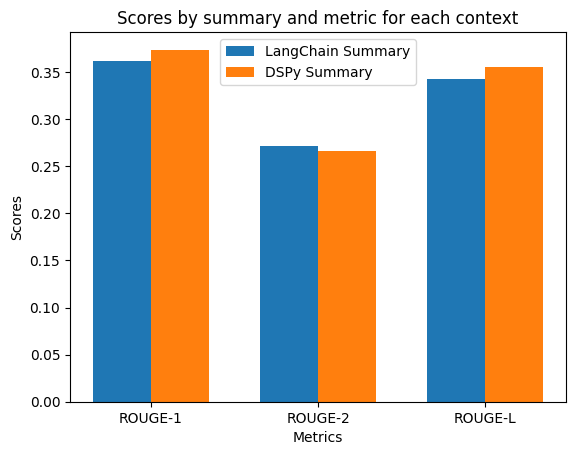

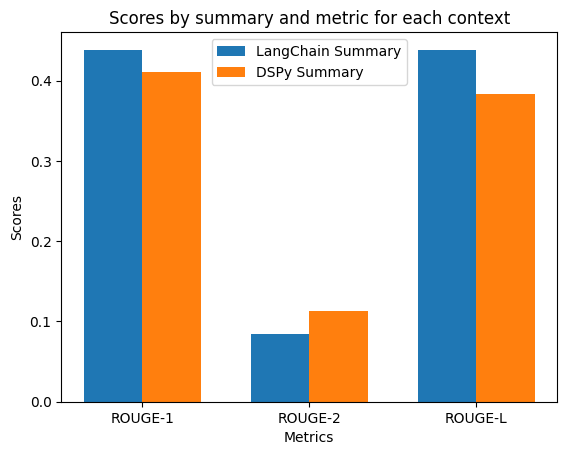

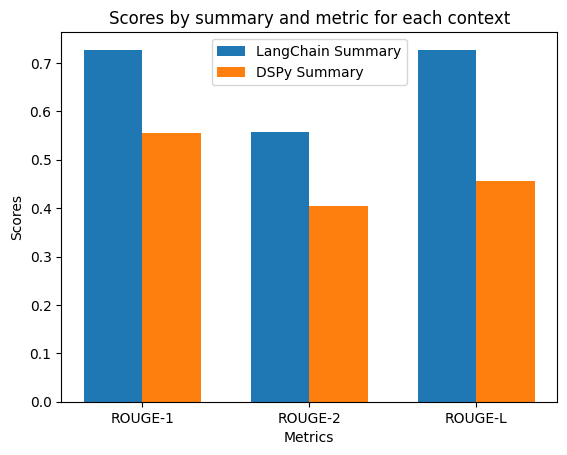

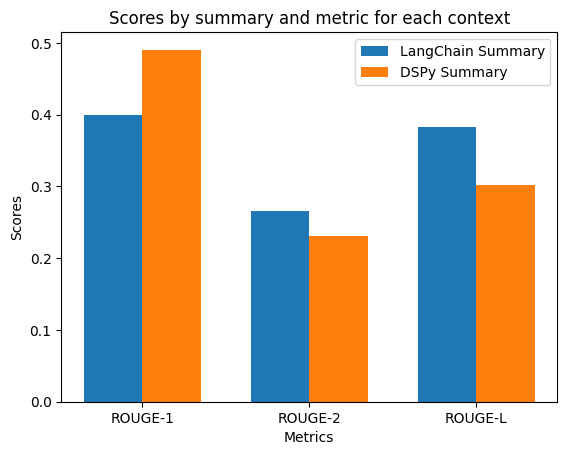

Context 1 - Overall Score for LangChain Summary: 0.3223
Context 1 - Overall Score for DSPy Summary: 0.3286
Better Summary for Context 1: DSPy Summary
Context 2 - Overall Score for LangChain Summary: 0.3172
Context 2 - Overall Score for DSPy Summary: 0.2994
Better Summary for Context 2: LangChain Summary
Context 3 - Overall Score for LangChain Summary: 0.6637
Context 3 - Overall Score for DSPy Summary: 0.4666
Better Summary for Context 3: LangChain Summary
Context 4 - Overall Score for LangChain Summary: 0.3459
Context 4 - Overall Score for DSPy Summary: 0.3377
Better Summary for Context 4: LangChain Summary


In [31]:
import matplotlib.pyplot as plt

overall_scores = []
weights = {'ROUGE-1': 0.33, 'ROUGE-2': 0.33, 'ROUGE-L': 0.33}

for doc, langchain, dspy in zip(full_context, langchain_results, dspy_results):
    results_langchain = evaluate_summary(doc, langchain)
    results_dspy = evaluate_summary(doc, dspy)

    # 가중치를 적용한 종합 점수 계산
    score_langchain = sum(results_langchain[key] * weights[key] for key in results_langchain)
    score_dspy = sum(results_dspy[key] * weights[key] for key in results_dspy)

    overall_scores.append((score_langchain, score_dspy))

    metrics = results_langchain.keys()
    scores_langchain = [results_langchain[m] for m in metrics]
    scores_dspy = [results_dspy[m] for m in metrics]

    fig, ax = plt.subplots()
    index = range(len(metrics))
    bar_width = 0.35

    rects1 = ax.bar(index, scores_langchain, bar_width, label='LangChain Summary')
    rects2 = ax.bar([p + bar_width for p in index], scores_dspy, bar_width, label='DSPy Summary')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by summary and metric for each context')
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.show()


for idx, (score_langchain, score_dspy) in enumerate(overall_scores, start=1):
    print(f"Context {idx} - Overall Score for LangChain Summary: {score_langchain:.4f}")
    print(f"Context {idx} - Overall Score for DSPy Summary: {score_dspy:.4f}")
    print(f"Better Summary for Context {idx}: {'LangChain Summary' if score_langchain > score_dspy else 'DSPy Summary'}")


In [32]:
## 여기에 dspy metric 이용해서 llm 평가 Agent 넣고 비교하면 될 듯.

In [33]:
import phoenix as px
session = px.launch_app()

🌍 To view the Phoenix app in your browser, visit http://localhost:6006/
📺 To view the Phoenix app in a notebook, run `px.active_session().view()`
📖 For more information on how to use Phoenix, check out https://docs.arize.com/phoenix


In [34]:
# import phoenix.experimental.evals.templates.default_templates as templates
# from phoenix.experimental.evals import (
#     OpenAIModel,
#     download_benchmark_dataset,
#     llm_classify,
# )

# model = OpenAIModel(
#     model_name="gpt-3.5-turbo",
#     temperature=0.0,
# )

# #The rails is used to hold the output to specific values based on the template
# #It will remove text such as ",,," or "..."
# #Will ensure the binary value expected from the template is returned 
# rails = list(templates.SUMMARIZATION_PROMPT_RAILS_MAP.values())

# summarization_classifications = llm_classify(
#     dataframe=df_sample,
#     template=templates.SUMMARIZATION_PROMPT_TEMPLATE,
#     model=model,
#     rails=rails,
#     provide_explanation=True, #optional to generate explanations for the value produced by the eval LLM
# )

In [35]:
import pandas as pd
df_langchain = pd.DataFrame({
    "input": full_context,  # context 데이터를 input 열로 설정
    "output": langchain_results  # langchain 결과를 output 열로 설정
})

# DataFrame 생성: context와 dspy 결합
df_dspy = pd.DataFrame({
    "input": full_context,  # context 데이터를 input 열로 설정
    "output": dspy_results  # dspy 결과를 output 열로 설정
})

In [46]:
import os
from getpass import getpass
import phoenix.evals.default_templates as templates
import matplotlib.pyplot as plt
import openai
import pandas as pd


from phoenix.evals import (
    OpenAIModel,
    download_benchmark_dataset,
    llm_classify,
)
from pycm import ConfusionMatrix
from sklearn.metrics import classification_report

model = OpenAIModel(
    model="gpt-3.5-turbo",
    temperature=0.0,
)

In [56]:
# The rails is used to hold the output to specific values based on the template
# It will remove text such as ",,," or "..."
# Will ensure the binary value expected from the template is returned

rails = list(templates.SUMMARIZATION_PROMPT_RAILS_MAP.values())
summarization_classifications = llm_classify(
    dataframe=df_dspy,
    template=templates.SUMMARIZATION_PROMPT_TEMPLATE,
    model=model,
    rails=rails,
    concurrency=20,
)["label"].tolist()

llm_classify |██████████| 4/4 (100.0%) | ⏳ 00:02<00:00 |  1.36it/s


In [57]:
print(summarization_classifications.scores)

AttributeError: 'list' object has no attribute 'scores'

In [59]:
# The rails is used to hold the output to specific values based on the template
# It will remove text such as ",,," or "..."
# Will ensure the binary value expected from the template is returned
rails = list(templates.SUMMARIZATION_PROMPT_RAILS_MAP.values())
summarization_classifications = llm_classify(
    dataframe=df_langchain,
    template=templates.SUMMARIZATION_PROMPT_TEMPLATE,
    model=model,
    rails=rails,
    concurrency=20,
)["label"].tolist()

llm_classify |██████████| 4/4 (100.0%) | ⏳ 00:02<00:00 |  1.41it/s


In [51]:
print(summarization_classifications)

['good', 'good', 'good', 'good']
